In [3]:
%autosave 30
from IPython.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))
import importlib as imp
import utils_models as fx
import glob

Autosaving every 30 seconds


### Training models in a loop

In [10]:
import random
def create_groups(num_groups, number_max_sessions_training, subjects_sessions):
    special_subjects = ['Monica', 'Skipper', 'Natasha', 'Phoebe']
    # Extract sessions for each subject for easy access
    sessions_per_subject = {}
    for subject, session in subjects_sessions:
        if subject not in sessions_per_subject:
            sessions_per_subject[subject] = []
        sessions_per_subject[subject].append(session)
    groups = []
    for _ in range(num_groups):
        # Step 3: Select one random subject from the special_subjects list
        chosen_special_subject = random.choice(special_subjects)

        # Step 4: Select one random session from the chosen special subject
        chosen_special_session = random.choice(sessions_per_subject[chosen_special_subject])

        # Exclude chosen subject for subsequent selections
        remaining_subjects = [subject for subject in sessions_per_subject if subject != chosen_special_subject]

        # Step 5: From the remaining subjects, select number_max_sessions_training sessions
        remaining_sessions = []
        for subject in remaining_subjects:
            remaining_sessions.extend([(subject, s) for s in sessions_per_subject[subject]])

        chosen_training_sessions = random.sample(remaining_sessions, min(number_max_sessions_training, len(remaining_sessions)))

        groups.append((chosen_special_subject, chosen_special_session, chosen_training_sessions))

    return groups
subjects_sessions = [('Phoebe', '210620'), 
                     ('Phoebe', '210717'),
                     ('Phoebe', '210626'),
                     ('Phoebe', '210725'),
                     ('Monica', '210724'),  
                     ('Monica', '210731'), 
                     ('Natasha', '220107'),
                     ('Natasha', '211211'),
                     ('Skipper', '210123'),
                     ('Stanford', '211205'), 
                     ('Stanford', '211228'), 
                     ('Smith', '210206'), 
                     ('Carrie', '210108')]
groups = create_groups(7, 5, subjects_sessions)
print(groups)

[('Phoebe', '210725', [('Smith', '210206'), ('Carrie', '210108'), ('Stanford', '211228'), ('Natasha', '220107'), ('Monica', '210731')]), ('Skipper', '210123', [('Smith', '210206'), ('Carrie', '210108'), ('Phoebe', '210725'), ('Phoebe', '210626'), ('Natasha', '220107')]), ('Natasha', '211211', [('Phoebe', '210725'), ('Carrie', '210108'), ('Stanford', '211205'), ('Stanford', '211228'), ('Monica', '210731')]), ('Phoebe', '210620', [('Monica', '210724'), ('Smith', '210206'), ('Natasha', '211211'), ('Carrie', '210108'), ('Monica', '210731')]), ('Skipper', '210123', [('Stanford', '211205'), ('Carrie', '210108'), ('Monica', '210731'), ('Natasha', '220107'), ('Phoebe', '210717')]), ('Skipper', '210123', [('Natasha', '220107'), ('Phoebe', '210626'), ('Carrie', '210108'), ('Phoebe', '210725'), ('Monica', '210731')]), ('Natasha', '220107', [('Smith', '210206'), ('Phoebe', '210717'), ('Carrie', '210108'), ('Stanford', '211228'), ('Phoebe', '210626')])]


## we do 7 session first !

In [4]:
original = [
    ('Natasha', '211211', [('Monica', '210724'), ('Phoebe', '210626'), ('Stanford', '211205'), ('Smith', '210206'), ('Phoebe', '210725'), ('Phoebe', '210717'), ('Stanford', '211228')]), 

]
# original = [
#     ('Skipper', '210123', [('Smith', '210206'), ('Stanford', '211205'), ('Monica', '210724'), ('Stanford', '211228'), ('Phoebe', '210620'), ('Phoebe', '210626'), ('Monica', '210731')]), 
#     ('Phoebe', '210626', [('Monica', '210731'), ('Smith', '210206'), ('Natasha', '220107'), ('Natasha', '211211'), ('Skipper', '210123'), ('Carrie', '210108'), ('Stanford', '211205')]), 
#     ('Skipper', '210123', [('Monica', '210724'), ('Natasha', '220107'), ('Stanford', '211205'), ('Natasha', '211211'), ('Phoebe', '210725'), ('Phoebe', '210717'), ('Stanford', '211228')]), 
#     ('Phoebe', '210725', [('Skipper', '210123'), ('Stanford', '211205'), ('Natasha', '211211'), ('Monica', '210724'), ('Natasha', '220107'), ('Monica', '210731'), ('Smith', '210206')]), 
#     ('Monica', '210724', [('Natasha', '211211'), ('Phoebe', '210626'), ('Skipper', '210123'), ('Smith', '210206'), ('Carrie', '210108'), ('Phoebe', '210620'), ('Natasha', '220107')]), 
#     ('Skipper', '210123', [('Phoebe', '210620'), ('Phoebe', '210725'), ('Monica', '210724'), ('Stanford', '211205'), ('Carrie', '210108'), ('Monica', '210731'), ('Phoebe', '210717')]), 
#     ('Phoebe', '210626', [('Natasha', '211211'), ('Monica', '210731'), ('Stanford', '211205'), ('Stanford', '211228'), ('Monica', '210724'), ('Natasha', '220107'), ('Carrie', '210108')])]

restructured = [(['_'.join(pair) for pair in session[2]], [session[0] + '_' + session[1]]) for session in original]

# Reversing the order for each tuple
restructured = [(training, testing) for training, testing in restructured]

print(restructured)
#[training 1, training2], [testing] aquesta es la estructura. Tota la resta segueix igual.
pairs = restructured

[(['Monica_210724', 'Phoebe_210626', 'Stanford_211205', 'Smith_210206', 'Phoebe_210725', 'Phoebe_210717', 'Stanford_211228'], ['Natasha_211211'])]


Organizing data...
=================Natasha=================
Building Model 1...
Epoch [1/6] Loss: 0.1926 Accuracy: 93.96%
Epoch [2/6] Loss: 0.1042 Accuracy: 96.84%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Natasha_TL_7subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0787 Accuracy: 97.68%
Epoch [4/6] Loss: 0.0630 Accuracy: 98.10%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Natasha_TL_7subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0509 Accuracy: 98.42%
Epoch [6/6] Loss: 0.0387 Accuracy: 98.80%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Natasha_TL_7subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


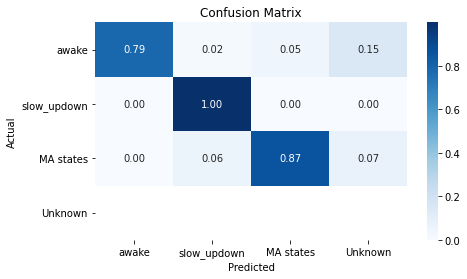

Building Model 2...


TypeError: mod2() missing 1 required positional argument: 'LEAVEONEOUT'

In [5]:
#loop to go through all the pairs, separating training and testing data
for pair in pairs:
    try:
        del testing_data, training_data, testing_states, training_states
        gc.collect()
    except:
        pass
    testing_data = []; training_data = []
    testing_states = []; training_states = []
    print('Organizing data...')
    training_ses = []
    testing_ses = []
    for session in pair[0]:
        training_ses.append(session)
    for session in pair[1]:
        testing_ses = session
    print(f"================={testing_ses.split('_')[0]}=================")
    for session in training_ses:
        name = session.split('_')[0]
        time = session.split('_')[1]
        #read data
        data, states = fx.read_data_and_metadata(name, time, best_channel=True)
        training_data.append(data)
        training_states.extend(states)
    training_data = np.concatenate(training_data, axis=0)

    for session in [testing_ses]:
        name = session.split('_')[0]
        time = session.split('_')[1]
        #read data

        data, states = fx.read_data_and_metadata(name, time, best_channel=True)
        testing_data.append(data)
        testing_states.extend(states)
    testing_data = np.concatenate(testing_data, axis=0)
    print('Building Model 1...')
    treshold_mod1 = 0.9
    name_testing_subject = testing_ses.split('_')[0]
    cm1, unknown_counts1 = fx.model1(name_testing_subject + '_TL_7subs_leaveoneout',
                                     training_data,
                                     training_states,
                                     testing_data,
                                     testing_states,
                                     treshold_mod1,
                                     norm=True)  # if normalize_data = False, means that we normalize it across subject BEFORE loop across subjects!!!

    print('Building Model 2...')
    treshold_mod2 = 0.85
    fx.mod2(name_testing_subject + '_TL_7subs_leaveoneout', training_data, training_states, testing_data, testing_states, treshold_mod2, norm=True)

## now 5 session !

In [4]:
original = [
    ('Phoebe', '210725', [('Smith', '210206'), ('Carrie', '210108'), ('Stanford', '211228'), ('Natasha', '220107'), ('Monica', '210731')]), 
    ('Skipper', '210123', [('Smith', '210206'), ('Carrie', '210108'), ('Phoebe', '210725'), ('Phoebe', '210626'), ('Natasha', '220107')]), 
    ('Natasha', '211211', [('Phoebe', '210725'), ('Carrie', '210108'), ('Stanford', '211205'), ('Stanford', '211228'), ('Monica', '210731')]), 
    ('Phoebe', '210620', [('Monica', '210724'), ('Smith', '210206'), ('Natasha', '211211'), ('Carrie', '210108'), ('Monica', '210731')]), 
    ('Skipper', '210123', [('Stanford', '211205'), ('Carrie', '210108'), ('Monica', '210731'), ('Natasha', '220107'), ('Phoebe', '210717')]), 
    ('Skipper', '210123', [('Natasha', '220107'), ('Phoebe', '210626'), ('Carrie', '210108'), ('Phoebe', '210725'), ('Monica', '210731')]), 
    ('Natasha', '220107', [('Smith', '210206'), ('Phoebe', '210717'), ('Carrie', '210108'), ('Stanford', '211228'), ('Phoebe', '210626')])]


restructured = [(['_'.join(pair) for pair in session[2]], [session[0] + '_' + session[1]]) for session in original]

# Reversing the order for each tuple
restructured = [(training, testing) for training, testing in restructured]

print(restructured)
#[training 1, training2], [testing] aquesta es la estructura. Tota la resta segueix igual.
pairs = restructured

[(['Smith_210206', 'Carrie_210108', 'Stanford_211228', 'Natasha_220107', 'Monica_210731'], ['Phoebe_210725']), (['Smith_210206', 'Carrie_210108', 'Phoebe_210725', 'Phoebe_210626', 'Natasha_220107'], ['Skipper_210123']), (['Phoebe_210725', 'Carrie_210108', 'Stanford_211205', 'Stanford_211228', 'Monica_210731'], ['Natasha_211211']), (['Monica_210724', 'Smith_210206', 'Natasha_211211', 'Carrie_210108', 'Monica_210731'], ['Phoebe_210620']), (['Stanford_211205', 'Carrie_210108', 'Monica_210731', 'Natasha_220107', 'Phoebe_210717'], ['Skipper_210123']), (['Natasha_220107', 'Phoebe_210626', 'Carrie_210108', 'Phoebe_210725', 'Monica_210731'], ['Skipper_210123']), (['Smith_210206', 'Phoebe_210717', 'Carrie_210108', 'Stanford_211228', 'Phoebe_210626'], ['Natasha_220107'])]


Organizing data...
=================Phoebe=================
Building Model 1...
Epoch [1/6] Loss: 0.1782 Accuracy: 94.17%
Epoch [2/6] Loss: 0.0934 Accuracy: 97.21%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Phoebe_TL_5subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0678 Accuracy: 98.03%
Epoch [4/6] Loss: 0.0565 Accuracy: 98.34%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Phoebe_TL_5subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0469 Accuracy: 98.56%
Epoch [6/6] Loss: 0.0364 Accuracy: 98.87%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Phoebe_TL_5subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


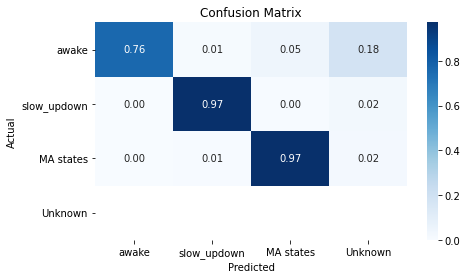

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Phoebe_TL_5subs_leaveoneout_10.h5
109/109 [==============================] - 1s 13ms/step
Organizing data...
=================Skipper=================
Building Model 1...
Epoch [1/6] Loss: 0.1457 Accuracy: 95.34%
Epoch [2/6] Loss: 0.0725 Accuracy: 97.89%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0485 Accuracy: 98.66%
Epoch [4/6] Loss: 0.0375 Accuracy: 98.92%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0301 Accuracy: 99.06%
Epoch [6/6] Loss: 0.0227 Accuracy: 99.29%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


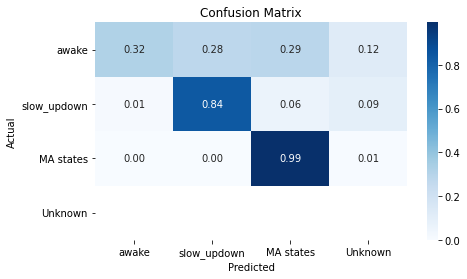

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Skipper_TL_5subs_leaveoneout_10.h5
164/164 [==============================] - 2s 14ms/step
Organizing data...
=================Natasha=================
Building Model 1...
Epoch [1/6] Loss: 0.1768 Accuracy: 94.13%
Epoch [2/6] Loss: 0.0955 Accuracy: 97.10%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Natasha_TL_5subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0706 Accuracy: 97.98%
Epoch [4/6] Loss: 0.0559 Accuracy: 98.35%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Natasha_TL_5subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0396 Accuracy: 98.78%
Epoch [6/6] Loss: 0.0301 Accuracy: 99.04%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Natasha_TL_5subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


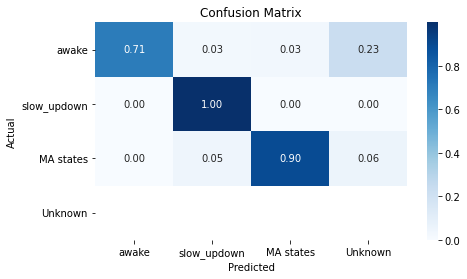

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Natasha_TL_5subs_leaveoneout_10.h5
191/191 [==============================] - 3s 15ms/step
Organizing data...
=================Phoebe=================
Building Model 1...
Epoch [1/6] Loss: 0.2460 Accuracy: 92.05%
Epoch [2/6] Loss: 0.1244 Accuracy: 96.26%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Phoebe_TL_5subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0944 Accuracy: 97.21%
Epoch [4/6] Loss: 0.0712 Accuracy: 97.72%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Phoebe_TL_5subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0551 Accuracy: 98.23%
Epoch [6/6] Loss: 0.0419 Accuracy: 98.63%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Phoebe_TL_5subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


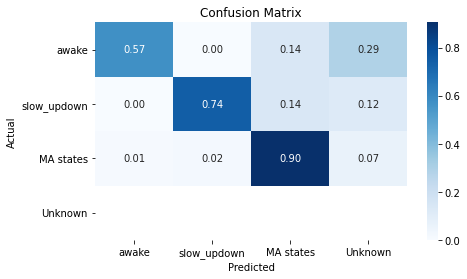

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Phoebe_TL_5subs_leaveoneout_10.h5
171/171 [==============================] - 2s 14ms/step
Organizing data...
=================Skipper=================
Building Model 1...
Epoch [1/6] Loss: 0.1800 Accuracy: 94.01%
Epoch [2/6] Loss: 0.1048 Accuracy: 96.87%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0760 Accuracy: 97.72%
Epoch [4/6] Loss: 0.0582 Accuracy: 98.25%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0433 Accuracy: 98.67%
Epoch [6/6] Loss: 0.0348 Accuracy: 98.93%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


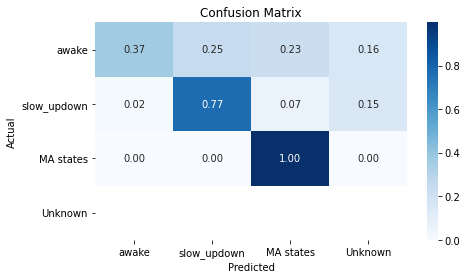

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Skipper_TL_5subs_leaveoneout_10.h5
164/164 [==============================] - 2s 14ms/step
Organizing data...
=================Skipper=================
Building Model 1...
Epoch [1/6] Loss: 0.1495 Accuracy: 95.37%
Epoch [2/6] Loss: 0.0770 Accuracy: 97.97%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0567 Accuracy: 98.41%
Epoch [4/6] Loss: 0.0408 Accuracy: 98.78%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0307 Accuracy: 99.06%
Epoch [6/6] Loss: 0.0258 Accuracy: 99.22%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Skipper_TL_5subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


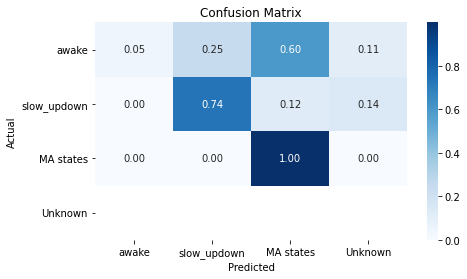

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Skipper_TL_5subs_leaveoneout_10.h5
164/164 [==============================] - 2s 14ms/step
Organizing data...
=================Natasha=================
Building Model 1...
Epoch [1/6] Loss: 0.1814 Accuracy: 94.11%
Epoch [2/6] Loss: 0.0831 Accuracy: 97.43%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Natasha_TL_5subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0596 Accuracy: 98.30%
Epoch [4/6] Loss: 0.0455 Accuracy: 98.67%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Natasha_TL_5subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0383 Accuracy: 98.81%
Epoch [6/6] Loss: 0.0285 Accuracy: 99.14%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Natasha_TL_5subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


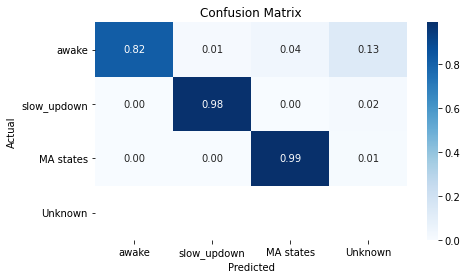

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Natasha_TL_5subs_leaveoneout_10.h5
138/138 [==============================] - 2s 14ms/step


In [5]:
#loop to go through all the pairs, separating training and testing data
for pair in pairs:
    try:
        del testing_data, training_data, testing_states, training_states
        gc.collect()
    except:
        pass
    testing_data = []; training_data = []
    testing_states = []; training_states = []
    print('Organizing data...')
    training_ses = []
    testing_ses = []
    for session in pair[0]:
        training_ses.append(session)
    for session in pair[1]:
        testing_ses = session
    print(f"================={testing_ses.split('_')[0]}=================")
    for session in training_ses:
        name = session.split('_')[0]
        time = session.split('_')[1]
        #read data
        data, states = fx.read_data_and_metadata(name, time, best_channel=True)
        training_data.append(data)
        training_states.extend(states)
    training_data = np.concatenate(training_data, axis=0)

    for session in [testing_ses]:
        name = session.split('_')[0]
        time = session.split('_')[1]
        #read data
        data, states = fx.read_data_and_metadata(name, time, best_channel=True)
        testing_data.append(data)
        testing_states.extend(states)
    testing_data = np.concatenate(testing_data, axis=0)
    print('Building Model 1...')
    treshold_mod1 = 0.9
    name_testing_subject = testing_ses.split('_')[0]
    cm1, unknown_counts1 = fx.model1(name_testing_subject + '_TL_5subs_leaveoneout',
                                     training_data,
                                     training_states,
                                     testing_data,
                                     testing_states,
                                     treshold_mod1,
                                     norm=True)  # if normalize_data = False, means that we normalize it across subject BEFORE loop across subjects!!!

    print('Building Model 2...')
    treshold_mod2 = 0.85
    fx.mod2(name_testing_subject + '_TL_5subs_leaveoneout', training_data, training_states, testing_data, testing_states, treshold_mod2, norm=True)

## now 2 session !

In [6]:
#[training 1, training2], [testing] aquesta es la estructura. Tota la resta segueix igual.
original = [
    ('Natasha', '220107', [('Monica', '210731'), ('Phoebe', '210626')]), 
    ('Skipper', '210123', [('Smith', '210206'), ('Stanford', '211228')]), 
    ('Skipper', '210123', [('Monica', '210724'), ('Stanford', '211205')]), 
    ('Natasha', '211211', [('Phoebe', '210620'), ('Stanford', '211205')]), 
    ('Skipper', '210123', [('Natasha', '211211'), ('Natasha', '220107')]), 
    ('Phoebe', '210626', [('Skipper', '210123'), ('Stanford', '211228')]), 
    ('Monica', '210731', [('Carrie', '210108'), ('Natasha', '220107')])]

restructured = [(['_'.join(pair) for pair in session[2]], [session[0] + '_' + session[1]]) for session in original]

# Reversing the order for each tuple
restructured = [(training, testing) for training, testing in restructured]

print(restructured)
pairs = restructured

[(['Monica_210731', 'Phoebe_210626'], ['Natasha_220107']), (['Smith_210206', 'Stanford_211228'], ['Skipper_210123']), (['Monica_210724', 'Stanford_211205'], ['Skipper_210123']), (['Phoebe_210620', 'Stanford_211205'], ['Natasha_211211']), (['Natasha_211211', 'Natasha_220107'], ['Skipper_210123']), (['Skipper_210123', 'Stanford_211228'], ['Phoebe_210626']), (['Carrie_210108', 'Natasha_220107'], ['Monica_210731'])]


Organizing data...
=================Natasha=================
Building Model 1...
Epoch [1/6] Loss: 0.2629 Accuracy: 91.08%
Epoch [2/6] Loss: 0.1317 Accuracy: 96.02%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Natasha_TL_2subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.1025 Accuracy: 97.05%
Epoch [4/6] Loss: 0.0783 Accuracy: 97.74%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Natasha_TL_2subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0596 Accuracy: 98.27%
Epoch [6/6] Loss: 0.0508 Accuracy: 98.39%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Natasha_TL_2subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


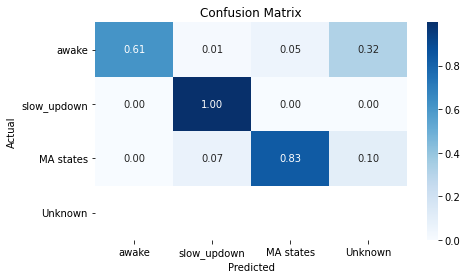

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Natasha_TL_2subs_leaveoneout_10.h5
138/138 [==============================] - 2s 14ms/step
Organizing data...
=================Skipper=================
Building Model 1...
Epoch [1/6] Loss: 0.2234 Accuracy: 92.00%
Epoch [2/6] Loss: 0.0882 Accuracy: 97.07%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0674 Accuracy: 97.67%
Epoch [4/6] Loss: 0.0490 Accuracy: 98.33%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0492 Accuracy: 98.32%
Epoch [6/6] Loss: 0.0322 Accuracy: 99.02%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


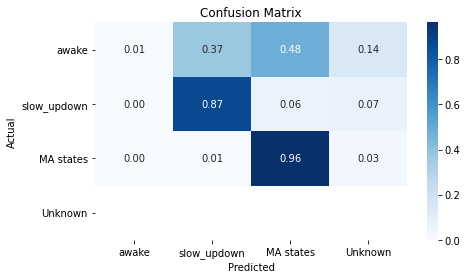

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Skipper_TL_2subs_leaveoneout_10.h5
164/164 [==============================] - 2s 14ms/step
Organizing data...
=================Skipper=================
Building Model 1...
Epoch [1/6] Loss: 0.3557 Accuracy: 86.92%
Epoch [2/6] Loss: 0.1772 Accuracy: 94.41%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.1381 Accuracy: 95.74%
Epoch [4/6] Loss: 0.1106 Accuracy: 96.44%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0793 Accuracy: 97.54%
Epoch [6/6] Loss: 0.0678 Accuracy: 97.66%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


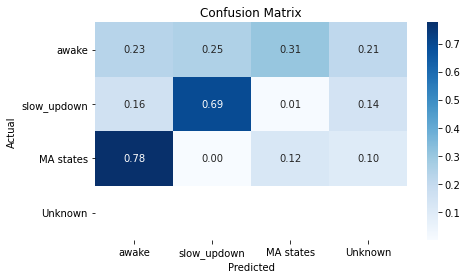

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Skipper_TL_2subs_leaveoneout_10.h5
164/164 [==============================] - 2s 15ms/step
Organizing data...
=================Natasha=================
Building Model 1...
Epoch [1/6] Loss: 0.2998 Accuracy: 88.74%
Epoch [2/6] Loss: 0.1888 Accuracy: 93.08%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Natasha_TL_2subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.1698 Accuracy: 93.97%
Epoch [4/6] Loss: 0.1532 Accuracy: 94.46%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Natasha_TL_2subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.1251 Accuracy: 95.46%
Epoch [6/6] Loss: 0.1031 Accuracy: 96.40%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Natasha_TL_2subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


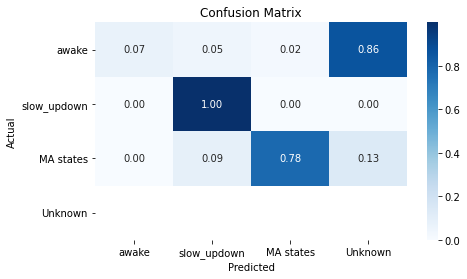

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Natasha_TL_2subs_leaveoneout_10.h5
191/191 [==============================] - 3s 14ms/step
Organizing data...
=================Skipper=================
Building Model 1...
Epoch [1/6] Loss: 0.1267 Accuracy: 96.04%
Epoch [2/6] Loss: 0.0424 Accuracy: 98.86%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0387 Accuracy: 98.94%
Epoch [4/6] Loss: 0.0300 Accuracy: 99.18%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0331 Accuracy: 98.98%
Epoch [6/6] Loss: 0.0211 Accuracy: 99.40%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Skipper_TL_2subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


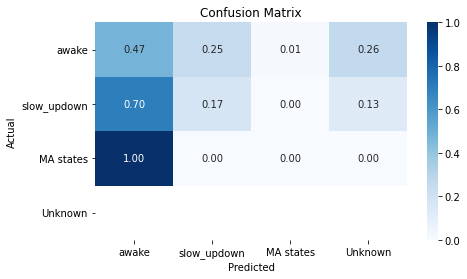

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Skipper_TL_2subs_leaveoneout_10.h5
164/164 [==============================] - 2s 14ms/step
Organizing data...
=================Phoebe=================
Building Model 1...
Epoch [1/6] Loss: 0.2075 Accuracy: 93.72%
Epoch [2/6] Loss: 0.1044 Accuracy: 96.87%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Phoebe_TL_2subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0791 Accuracy: 97.69%
Epoch [4/6] Loss: 0.0635 Accuracy: 98.07%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Phoebe_TL_2subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0505 Accuracy: 98.51%
Epoch [6/6] Loss: 0.0412 Accuracy: 98.70%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Phoebe_TL_2subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


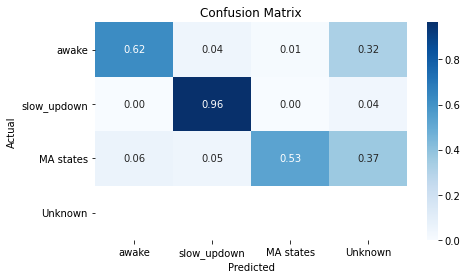

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Phoebe_TL_2subs_leaveoneout_10.h5
152/152 [==============================] - 2s 14ms/step
Organizing data...
=================Monica=================
Building Model 1...
Epoch [1/6] Loss: 0.1246 Accuracy: 96.12%
Epoch [2/6] Loss: 0.0638 Accuracy: 97.93%
Saved primary model at epoch 2 as models_trainmain/primary_model_epoch_Monica_TL_2subs_leaveoneout_2.pth
Epoch [3/6] Loss: 0.0384 Accuracy: 98.78%
Epoch [4/6] Loss: 0.0299 Accuracy: 99.17%
Saved primary model at epoch 4 as models_trainmain/primary_model_epoch_Monica_TL_2subs_leaveoneout_4.pth
Epoch [5/6] Loss: 0.0226 Accuracy: 99.33%
Epoch [6/6] Loss: 0.0157 Accuracy: 99.54%
Saved primary model at epoch 6 as models_trainmain/primary_model_epoch_Monica_TL_2subs_leaveoneout_6.pth
Training of primary model complete.
Trained a new model as no saved model was found for epoch 3


C:\Users\manasanch.IBP10386\Desktop\ANESTHESIA_LEVELS\DATA\DATA_LIVEPAPER\RAW TRANSITIONS\full_recordings\utils_models.py:350: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


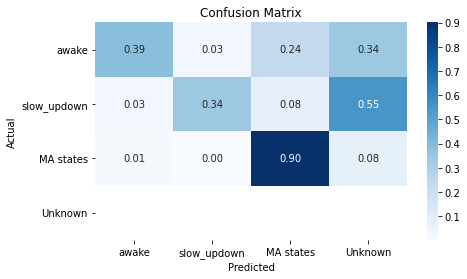

Building Model 2...
Loaded model from models_MAstates/model_MAstates_Monica_TL_2subs_leaveoneout_10.h5
141/141 [==============================] - 2s 14ms/step


In [7]:
#loop to go through all the pairs, separating training and testing data
for pair in pairs:
    try:
        del testing_data, training_data, testing_states, training_states
        gc.collect()
    except:
        pass
    testing_data = []; training_data = []
    testing_states = []; training_states = []
    print('Organizing data...')
    training_ses = []
    testing_ses = []
    for session in pair[0]:
        training_ses.append(session)
    for session in pair[1]:
        testing_ses = session
    print(f"================={testing_ses.split('_')[0]}=================")
    for session in training_ses:
        name = session.split('_')[0]
        time = session.split('_')[1]
        #read data
        data, states = fx.read_data_and_metadata(name, time, best_channel=True)
        training_data.append(data)
        training_states.extend(states)
    training_data = np.concatenate(training_data, axis=0)

    for session in [testing_ses]:
        name = session.split('_')[0]
        time = session.split('_')[1]
        #read data
        data, states = fx.read_data_and_metadata(name, time, best_channel=True)
        testing_data.append(data)
        testing_states.extend(states)
    testing_data = np.concatenate(testing_data, axis=0)
    print('Building Model 1...')
    treshold_mod1 = 0.9
    name_testing_subject = testing_ses.split('_')[0]
    cm1, unknown_counts1 = fx.model1(name_testing_subject + '_TL_2subs_leaveoneout',
                                     training_data,
                                     training_states,
                                     testing_data,
                                     testing_states,
                                     treshold_mod1,
                                     norm=True)  # if normalize_data = False, means that we normalize it across subject BEFORE loop across subjects!!!

    print('Building Model 2...')
    treshold_mod2 = 0.85
    fx.mod2(name_testing_subject + '_TL_2subs_leaveoneout', training_data, training_states, testing_data, testing_states, treshold_mod2, norm=True)